In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import string
import re
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.metrics import mean_squared_error

import pickle

In [2]:
sns.set(style='whitegrid', palette='muted', font_scale=1.3)
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [3]:
rating = pd.read_csv(r"Rating.csv").head(60000)
teleplay = pd.read_csv(r'Teleplay.csv', usecols=['teleplay_id','name']).head(60000)
rating['rating'] = rating['rating'].replace([-1], np.nan)
print(rating.head())

   Unnamed: 0  user_id  teleplay_id  rating
0           0        1           20     NaN
1           1        1           24     NaN
2           2        1           79     NaN
3           3        1          226     NaN
4           4        1          241     NaN


In [4]:
d = pd.read_csv(r"Rating.csv")

e=d[d.user_id == 53698]
e

,Unnamed: 0,user_id,teleplay_id,rating
5728613,5728613,53698,1,6
5728614,5728614,53698,5,6
5728615,5728615,53698,6,7
5728616,5728616,53698,7,8
5728617,5728617,53698,16,7
...,...,...,...,...
5731503,5731503,53698,30912,7
5731504,5731504,53698,30925,5
5731505,5731505,53698,31115,5
5731506,5731506,53698,31137,6


In [5]:
rating = pd.concat([rating, e])

In [6]:
rating[rating.user_id == 53698]

,Unnamed: 0,user_id,teleplay_id,rating
5728613,5728613,53698,1,6.0
5728614,5728614,53698,5,6.0
5728615,5728615,53698,6,7.0
5728616,5728616,53698,7,8.0
5728617,5728617,53698,16,7.0
...,...,...,...,...
5731503,5731503,53698,30912,7.0
5731504,5731504,53698,30925,5.0
5731505,5731505,53698,31115,5.0
5731506,5731506,53698,31137,6.0


In [7]:
ap = pd.merge(teleplay, rating,left_on="teleplay_id",right_on="teleplay_id")
ap = ap.rename(columns={"rating": "Rating"})
ap

,teleplay_id,name,Unnamed: 0,user_id,Rating
0,32281,Kimi no Na wa.,8271,99,5.0
1,32281,Kimi no Na wa.,11961,152,10.0
2,32281,Kimi no Na wa.,19665,244,10.0
3,32281,Kimi no Na wa.,22985,271,10.0
4,32281,Kimi no Na wa.,23382,278,NaN
...,...,...,...,...,...
52240,1639,Boku no Pico,55290,572,1.0
52241,23171,Mahou Shoujo wa Kiss Shite Kawaru,16025,201,NaN
52242,5561,Yayoi,5729856,53698,5.0
52243,4178,Dream Hazard: Akuma no Program,5729671,53698,5.0


In [8]:
# preprocessing
ratings_df = ap.pivot_table(index='user_id', columns='teleplay_id', values='Rating')
ratings = ratings_df.fillna(0).values

In [9]:
ratings_df


teleplay_id,1,5,6,7,8,15,17,18,19,20,...,33161,33209,33221,33222,33241,33338,33372,33524,33558,34240
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,8.0,NaN,NaN,6.0,6.0,6.0,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

In [11]:
class Recommender:

    def __init__(self, n_epochs=50, n_latent_features=2, lmbda=0.1, learning_rate=0.02):
        self.n_epochs = n_epochs
        self.n_latent_features = n_latent_features
        self.lmbda = lmbda
        self.learning_rate = learning_rate


    def predictions(self, P, Q):
        return np.dot(P.T, Q)

    def fit(self, X_train, X_val):
        m, n = X_train.shape

        self.P = 3 * np.random.rand(self.n_latent_features, m)
        self.Q = 3 * np.random.rand(self.n_latent_features, n)
        
        self.train_error = []
        self.val_error = []

        users, items = X_train.nonzero()
        
        for epoch in range(self.n_epochs):
            for u, i in zip(users, items):
                error = X_train[u, i] - self.predictions(self.P[:,u], self.Q[:,i])
                self.P[:, u] += self.learning_rate * (error * self.Q[:, i] - self.lmbda * self.P[:, u])
                self.Q[:, i] += self.learning_rate * (error * self.P[:, u] - self.lmbda * self.Q[:, i])

            train_rmse = rmse(self.predictions(self.P, self.Q), X_train)
            val_rmse = rmse(self.predictions(self.P, self.Q), X_val)
            self.train_error.append(train_rmse)
            self.val_error.append(val_rmse)
            
        return self
    
    def predict(self, X_train, user_index):
        y_hat = self.predictions(self.P, self.Q)
        predictions_index = np.where(X_train[user_index, :] == 0)[0]
        return y_hat[user_index, predictions_index].flatten()

In [12]:
MIN_USER_RATINGS = 100
DELETE_RATING_COUNT = 100

def train_test_splits(ratings):

    validation = np.zeros(ratings.shape)
    train = ratings.copy()

    for user in np.arange(ratings.shape[0]):
        if len(ratings[user,:].nonzero()[0]) >= MIN_USER_RATINGS:
            val_ratings = np.random.choice(
              ratings[user, :].nonzero()[0],
              size=DELETE_RATING_COUNT,
              replace=False
            )
            train[user, val_ratings] = 0
            validation[user, val_ratings] = ratings[user, val_ratings]
    return train, validation


In [13]:
train, val = train_test_splits(ratings)

In [14]:
recommender = Recommender().fit(train,val)

In [15]:
import matplotlib.pyplot as plt

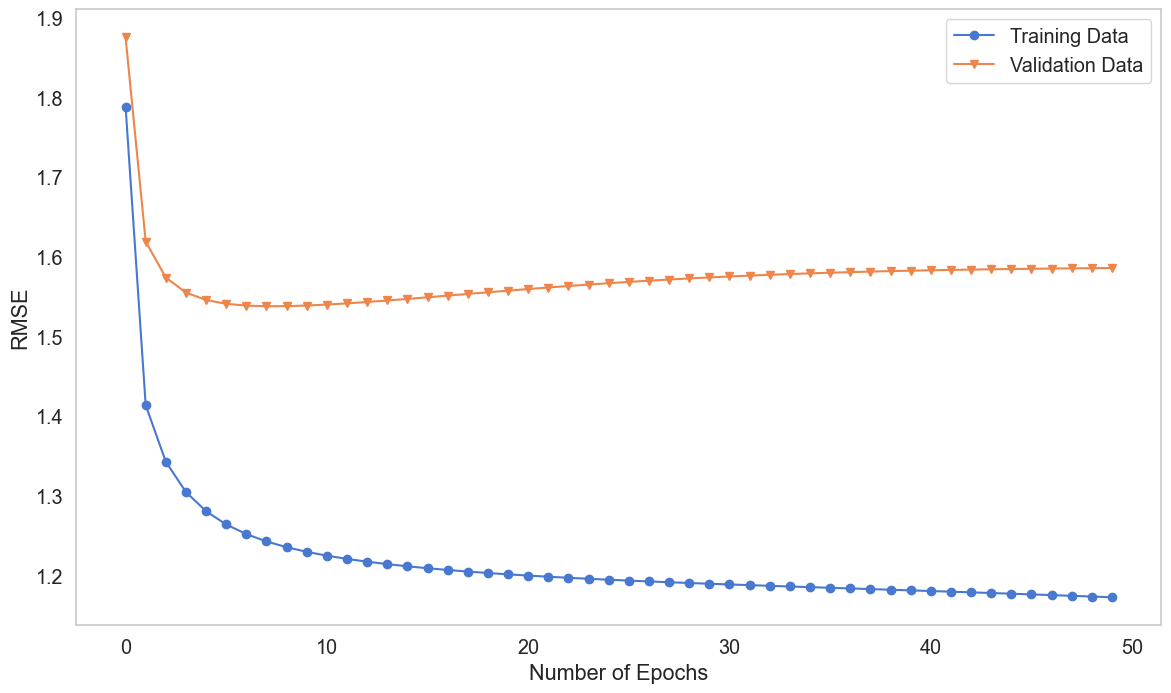

In [16]:
plt.plot(range(recommender.n_epochs), recommender.train_error, marker='o', label='Training Data')
plt.plot(range(recommender.n_epochs), recommender.val_error, marker='v', label='Validation Data')
plt.xlabel('Number of Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.grid()
plt.show()

In [17]:
user_id = 53698

user_index = ratings_df.index.get_loc(user_id)
predictions_index = np.where(train[user_index, :] == 0)[0]

rating_predictions = recommender.predict(train, user_index)

In [18]:
def create_artist_ratings(teleplay, predictions_index, rating_predictions, n=10):
    artist_ids = ratings_df.columns[predictions_index]
    artist_ratings = pd.DataFrame(data=dict(teleplay_id=artist_ids, rating=rating_predictions))
    top_n_artists = artist_ratings.sort_values("rating", ascending=False)

    artist_recommendations = teleplay[teleplay.teleplay_id.isin(top_n_artists.teleplay_id)].reset_index(drop=True)
    artist_recommendations['rating'] = pd.Series(top_n_artists.rating.values)
    return artist_recommendations.sort_values("rating", ascending=False)

In [19]:
Predictions = create_artist_ratings(teleplay, predictions_index, rating_predictions)
Predictions

,teleplay_id,name,rating
0,32281,Kimi no Na wa.,10.362057
1,28977,Gintama°,9.734900
2,9969,Gintama&#039;,9.566208
3,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,9.467115
4,11061,Hunter x Hunter (2011),9.455670
...,...,...,...
1826,2592,Kimera,0.610733
1827,5391,Pico to Chico,0.501590
1828,4866,Pico x CoCo x Chico,0.463318
1829,30663,Docchi mo Maid,0.248417


In [20]:
dffinaldata = [Predictions["teleplay_id"], Predictions["rating"]]

dffinalheaders = ["teleplay_id", "rating"]

dffinal = pd.concat(dffinaldata, axis=1, keys=dffinalheaders)
dffinal

,teleplay_id,rating
0,32281,10.362057
1,28977,9.734900
2,9969,9.566208
3,32935,9.467115
4,11061,9.455670
...,...,...
1826,2592,0.610733
1827,5391,0.501590
1828,4866,0.463318
1829,30663,0.248417


In [21]:
FinalData = pd.DataFrame(dffinal)
FinalData.to_csv('18080395d_task2.csv')